**Korzystając z notebooka o sieciach konwolucyjnych oraz notebooka o płytkiej sieci w Tensorflow, za pomocą biblioteki Tensorflow zaprojektuj konwolucyjną sieć neuronową o architekturze zbliżonej do słynnej sieci [LeNet-5](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) której sukcesy w rozpoznawaniu obrazów rozpoczęły na przełomie lat 80. i 90. boom na głębokie uczenie, i użyj jej do predykcji zbioru FashionMnist, zgodnie z następującym opisem:**

|Nr warstwy|Rodzaj|Rozmiar wyjścia|Liczba filtrów|Rozmiar jądra (`kernel_size`)|Krok (`stride`)|Padding|Funkcja aktywacji|
|----------|---|---------------|--------------|-----------------------|---------------|-------|-----------------|
|1|splotowa|$28\times 28$|6|$5\times 5$|1|2|tanh|
|2|avgerage pooling|$14\times 14$|6|$2\times 2$|2|0|sigmoid|
|3|splotowa|$10\times 10$|16|$5\times 5$|1|0|tanh|
|4|average pooling|$5\times 5$|16|$2\times 2$|2|0|sigmoid|
|5|splotowa|$1\times 1$|120|$5\times 5$|1|0|tanh|
|6|pełna|84|||||tanh|
|7|pełna|10|||||softmax|

**Kolejne kroki:**
 - załadowanie zbioru
 - wydzielenie zbioru walidacyjnego
 - normalizacja i kategoryzacja danych
 - zaprojektowanie sieci (nie zapominaj o spłaszczeniu w odpowiednim momencie)
 - zbudowanie modelu z dowolną funkcją kosztu dla problemów wieloklasowych, dowolnym optymalizatorem i trafnością jako metryką
 - nauczenie sieci w maksymalnie stu epokach z zastosowaniem wczesnego zatrzymania (najlepiej użyć wbudowanego, z dowolną wartością do monitorowania)
 - ewaluacja modelu na zbiorze walidacyjnym
 - wyświetlenie 10 niepoprawnie zaklasyfikowanych próbek w postaci: prawdziwa prognozowana, np. 2 7

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AvgPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix

Załadowanie zbioru

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


Wydzielenie zboiru walidacyjnego

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

Normalizacja i kategoryzacja danych

In [4]:
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [5]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)
y_test = to_categorical(y_test, n_classes)

Zaprojektowanie sieci i zbudowanie modelu

In [6]:
def lenet5():
    model = Sequential([
        Conv2D(filters=6, kernel_size=(5, 5), padding='same', strides=(1,1), activation='tanh',
                input_shape=(28, 28, 1)),
        AvgPool2D(pool_size=(2, 2), strides=(2,2)),
        Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
        AvgPool2D(pool_size=(2, 2), strides=(2,2)),
        Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
        Flatten(),
        Dense(units=84, activation='tanh'),
        Dense(units=10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [7]:
model = lenet5()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

Trening sieci

In [8]:
def train_lenet5(X_train, X_test, y_train, y_test, model, epochs=100, monitor='loss', patience=3):
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
              callbacks=[EarlyStopping(monitor=monitor, patience=patience)])
    return model

In [9]:
model = train_lenet5(X_train, X_val, y_train, y_val, model, epochs=100, monitor='val_loss', patience=3)


Epoch 1/100
1500/1500 [==============================] - 15s 8ms/step - loss: 0.5446 - accuracy: 0.7991 - val_loss: 0.4221 - val_accuracy: 0.8459
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3851 - accuracy: 0.8609 - val_loss: 0.3757 - val_accuracy: 0.8593
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3431 - accuracy: 0.8745 - val_loss: 0.3437 - val_accuracy: 0.8769
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3124 - accuracy: 0.8854 - val_loss: 0.3290 - val_accuracy: 0.8832
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2898 - accuracy: 0.8925 - val_loss: 0.3214 - val_accuracy: 0.8803
Epoch 6/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2697 - accuracy: 0.9001 - val_loss: 0.3198 - val_accuracy: 0.8840
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2541 - accuracy: 0.9048 - val_loss: 0.3086 - val_

In [10]:
model.history.history['val_loss']

[0.42214441299438477,
 0.3757445812225342,
 0.3437407910823822,
 0.3290189504623413,
 0.3213980793952942,
 0.3198001980781555,
 0.30862486362457275,
 0.3163977563381195,
 0.30060669779777527,
 0.3010435700416565,
 0.3106957674026489,
 0.3025960326194763]

Ewaluacja modelu na zbiorze walidacyjnym

In [11]:
model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 4ms/step - loss: 0.3026 - accuracy: 0.8963


[0.3025960326194763, 0.8962500095367432]

Predykcja modelu

In [12]:
predictions = model.predict(X_test)

In [13]:
print(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))

0.8875


Wyświetlenie 10 niepoprawnie zaklasyfikowanych próbek w postaci: prawdziwa prognozowana, np. 2 7

In [14]:
y_test_bad_predicton =y_test[y_test.argmax(axis=1) != predictions.argmax(axis=1)].argmax(axis=1)
bad_predictions  = predictions[y_test.argmax(axis=1) != predictions.argmax(axis=1)].argmax(axis=1)
for y_true, y_pred in zip(y_test_bad_predicton[:10], bad_predictions[:10]):
    print(f'True value: {y_true}, Predicted value: {y_pred}')

True value: 7, Predicted value: 5
True value: 4, Predicted value: 2
True value: 9, Predicted value: 5
True value: 4, Predicted value: 2
True value: 6, Predicted value: 0
True value: 3, Predicted value: 6
True value: 2, Predicted value: 6
True value: 2, Predicted value: 6
True value: 4, Predicted value: 2
True value: 3, Predicted value: 4


<Figure size 1872x1872 with 0 Axes>

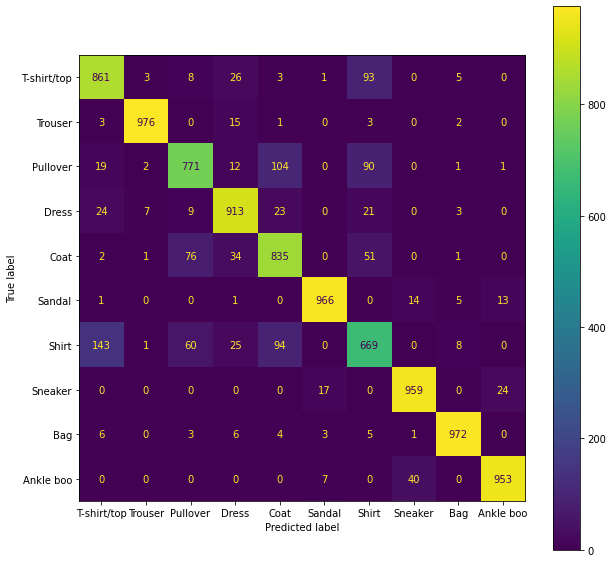

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(26,26))
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
cmd = ConfusionMatrixDisplay(cm, display_labels=[
                                                 'T-shirt/top',
                                                 'Trouser',
                                                 'Pullover',
                                                 'Dress',
                                                 'Coat',
                                                 'Sandal',
                                                 'Shirt',
                                                 'Sneaker',
                                                 'Bag',
                                                 'Ankle boo'
                                                 ])
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)


<tbody>
<tr>
<td align="center">0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td align="center">1</td>
<td>Trouser</td>
</tr>
<tr>
<td align="center">2</td>
<td>Pullover</td>
</tr>
<tr>
<td align="center">3</td>
<td>Dress</td>
</tr>
<tr>
<td align="center">4</td>
<td>Coat</td>
</tr>
<tr>
<td align="center">5</td>
<td>Sandal</td>
</tr>
<tr>
<td align="center">6</td>
<td>Shirt</td>
</tr>
<tr>
<td align="center">7</td>
<td>Sneaker</td>
</tr>
<tr>
<td align="center">8</td>
<td>Bag</td>
</tr>
<tr>
<td align="center">9</td>
<td>Ankle boot</td>
</tr>
</tbody>